In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


path = '../9.데이터/titanic/'

In [161]:
data = pd.read_csv(path + 'train.csv')

In [162]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 객실 등급에 따른 생존자 수 히스토그램

([<matplotlib.axis.XTick at 0x17b75e3bac8>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

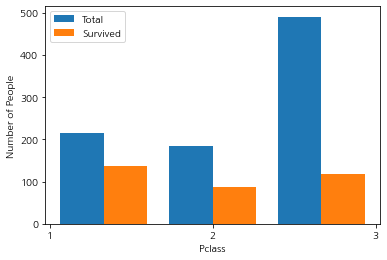

In [163]:
data_survived = data[data.Survived == 1]
plt.hist([data['Pclass'], data_survived['Pclass']], bins=3)
plt.legend(['Total', 'Survived'])
plt.xlabel('Pclass')
plt.ylabel('Number of People')
plt.xticks([1,2,3])

## 성별과 객실 등급에 따른 생존자 수 히스토그램

In [164]:
data_f = data[data.Sex == 'female']
data_Fclass = data[data.Pclass == 1]
data_f_or_Fclass = data[(data.Sex == 'female')|(data.Pclass == 1)]

### 1) 여성이거나 1등석인 경우와 여성 일때

([<matplotlib.axis.XTick at 0x17b75eb1f48>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

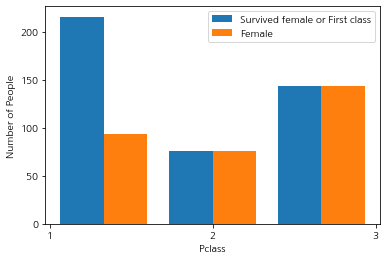

In [165]:
plt.hist([data_f_or_Fclass.Pclass, data_f.Pclass], bins = 3)
plt.legend(['Survived female or First class', 'Female'])
plt.xlabel('Pclass')
plt.ylabel('Number of People')
plt.xticks([1,2,3])

### 2) 여성이거나 1등석인 경우와 1등석 일때

([<matplotlib.axis.XTick at 0x17b75e90388>,
 [Text(0, 0, ''), Text(0, 0, '')])

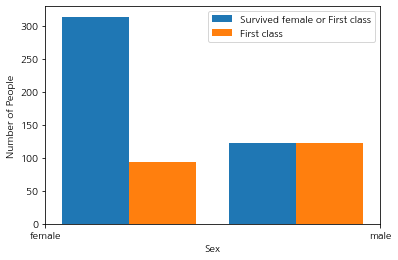

In [166]:
plt.hist([data_f_or_Fclass.Sex, data_Fclass.Sex], bins = 2)
plt.legend(['Survived female or First class', 'First class'])
plt.xlabel('Sex')
plt.ylabel('Number of People')
plt.xticks([0,1])

## 연령대에 따른 생존여부

In [194]:
for i in range(10, 100, 10):
    if i == 10:
        total_data = data[data.Age < i]
        total_data['Ages'] = i-10
    else:
        data_Age = data[(data.Age < i) & (data.Age >= i-10)]
        data_Age['Ages'] = i-10
        total_data = pd.concat([total_data, data_Age])
    num += 1

C:\tools\Anaconda3\envs\tensorflow2_py37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\tools\Anaconda3\envs\tensorflow2_py37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\tools\Anaconda3\envs\tensorflow2_py37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [195]:
data_survived = total_data[total_data.Survived == 1]

([<matplotlib.axis.XTick at 0x17b77f59288>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

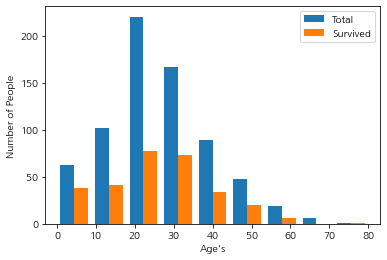

In [196]:
plt.hist([total_data.Ages, data_survived.Ages], bins=9)
plt.legend(['Total', 'Survived'])
plt.xlabel("""Age's""")
plt.ylabel('Number of People')
plt.xticks([0,10,20,30,40,50,60,70,80])

In [212]:
total_data[total_data.Ages == 20].shape

(220, 14)

In [213]:
data_survived[data_survived.Ages == 20].shape

(77, 14)

## 탑승자 가족수에 따른 생존자 수

In [227]:
data[data.Parch == 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,2
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q,5
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S,4
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S,2
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S,2
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,2
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,1


In [226]:
print("부모&아이")
print(data[(data.Parch == 0) & (data.Survived ==1)].shape[0]/891)
print(data[(data.Parch == 1) & (data.Survived ==1)].shape[0]/891)
print(data[(data.Parch == 2) & (data.Survived ==1)].shape[0]/891)
print(data[(data.Parch == 3) & (data.Survived ==1)].shape[0]/891)
print(data[(data.Parch == 4) & (data.Survived ==1)].shape[0]/891)
print(data[(data.Parch == 5) & (data.Survived ==1)].shape[0]/891)
print(data[(data.Parch == 6) & (data.Survived ==1)].shape[0]/891)
print(data[(data.Parch == 7) & (data.Survived ==1)].shape[0]/891)
print(data[(data.Parch == 8) & (data.Survived ==1)].shape[0]/891)
print("친인척")
print(data[(data.SibSp == 0) & (data.Survived ==1)].shape[0]/891)
print(data[(data.SibSp == 1) & (data.Survived ==1)].shape[0]/891)
print(data[(data.SibSp == 2) & (data.Survived ==1)].shape[0]/891)
print(data[(data.SibSp == 3) & (data.Survived ==1)].shape[0]/891)
print(data[(data.SibSp == 4) & (data.Survived ==1)].shape[0]/891)
print(data[(data.SibSp == 5) & (data.Survived ==1)].shape[0]/891)
print(data[(data.SibSp == 6) & (data.Survived ==1)].shape[0]/891)
print(data[(data.SibSp == 7) & (data.Survived ==1)].shape[0]/891)
print(data[(data.SibSp == 8) & (data.Survived ==1)].shape[0]/891)
print("가족전부")
print(data[(data.Family == 0) & (data.Survived ==1)].shape[0]/891)
print(data[(data.Family == 1) & (data.Survived ==1)].shape[0]/891)
print(data[(data.Family == 2) & (data.Survived ==1)].shape[0]/891)
print(data[(data.Family == 3) & (data.Survived ==1)].shape[0]/891)
print(data[(data.Family == 4) & (data.Survived ==1)].shape[0]/891)
print(data[(data.Family == 5) & (data.Survived ==1)].shape[0]/891)
print(data[(data.Family == 6) & (data.Survived ==1)].shape[0]/891)
print(data[(data.Family == 7) & (data.Survived ==1)].shape[0]/891)
print(data[(data.Family == 8) & (data.Survived ==1)].shape[0]/891)


부모&아이
0.2615039281705948
0.07295173961840629
0.04489337822671156
0.003367003367003367
0.0
0.001122334455667789
0.0
0.0
0.0
친인척
0.2356902356902357
0.12570145903479238
0.014590347923681257
0.004489337822671156
0.003367003367003367
0.0
0.0
0.0
0.0
가족전부
0.1829405162738496
0.09988776655443322
0.06621773288439955
0.02356902356902357
0.003367003367003367
0.003367003367003367
0.004489337822671156
0.0
0.0


In [184]:
data['Family'] = data.Parch + data.SibSp
data_Nonsurvived = data[data.Survived != 1]
data_survived = data[data.Survived == 1]

([<matplotlib.axis.XTick at 0x17b764668c8>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

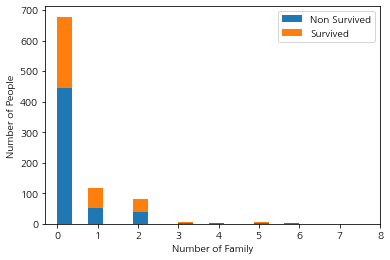

In [188]:
plt.hist([data_Nonsurvived.Parch, data_survived.Parch], bins = 16, stacked=True)
plt.legend(['Non Survived', 'Survived'])
plt.xlabel('Number of Family')
plt.ylabel('Number of People')
plt.xticks([0,1,2,3,4,5,6,7,8])

([<matplotlib.axis.XTick at 0x17b76966a08>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

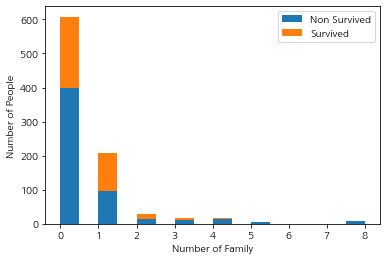

In [189]:
plt.hist([data_Nonsurvived.SibSp, data_survived.SibSp], bins = 16, stacked=True)
plt.legend(['Non Survived', 'Survived'])
plt.xlabel('Number of Family')
plt.ylabel('Number of People')
plt.xticks([0,1,2,3,4,5,6,7,8])

([<matplotlib.axis.XTick at 0x17b77bba188>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

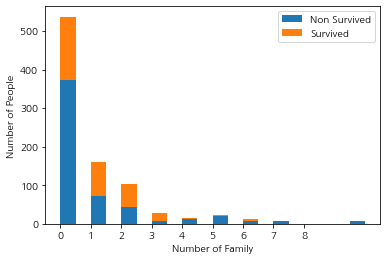

In [192]:
plt.hist([data_Nonsurvived.Family, data_survived.Family], bins = 20, stacked=True)
plt.legend(['Non Survived', 'Survived'])
plt.xlabel('Number of Family')
plt.ylabel('Number of People')
plt.xticks([0,1,2,3,4,5,6,7,8])